# Dimentionality reduction of CNN using t-distributed stochastic neighbor embedding (t-SNE)

In [1]:
import h5py
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
import matplotlib
matplotlib.style.use('ggplot')
import scipy

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


importing data

In [2]:
h5f = h5py.File('datasets/extracted_tsne.h5','r')
extracted_train = h5f['extracted_data'][:]
h5f.close()

h5f = h5py.File('datasets/extracted_tsne_test.h5','r')
extracted_test = h5f['extracted_data'][:]
h5f.close()

train = h5py.File('datasets/datatraining.h5','r')
test = h5py.File('datasets/datatest.h5','r')
X_train, y_train = train['data'][:], train['labels'][:]
X_test, y_test = test['data'][:], test['labels'][:]
train.close()
test.close()

Now onto the dimensionality reduction part

Since the number of features is very high (4096), I will use another dimentionality technique. However, first I need to check if the data is sparse or not.

In [3]:
print("traning data")
print(scipy.sparse.issparse(extracted_train))
print("test data")
print(scipy.sparse.issparse(extracted_test))

print(len(np.where(extracted_train==0)[0]))
print(extracted_train.size)

traning data
False
test data
False
13771614
20480000


Therefore, since both sets are made up of dense data, I will use PCA before t-SNE

Class names

In [4]:
labels = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

### t-SNE computation and plot function

In [5]:
def t_sne(extracted,y,labels,type_='traning',values=True,use_PCA=True):
    '''
    Args:
        extracted - CNN codes
        y - image_labels
        type_ = training or test
        labels - class names
        values- tsne results
    
    Returns: 2D plot of embedded values
    '''
    #computing PCA
    if use_PCA:
        pca_50 = PCA(n_components=50)
        extracted = pca_50.fit_transform(extracted)
        print('Cumulative explained variation for 50 principal components: {}'.format(np.sum(pca_50.explained_variance_ratio_)))
    
    # computing t-SNE
    time_start = time.time()
    tsne = TSNE(n_components=2, verbose=3, perplexity=20, n_iter=300,learning_rate=250)
    tsne_results = tsne.fit_transform(extracted)
    print ("t-SNE done! Time elapsed: {} seconds".format(time.time()-time_start))
    
    # plotting part
    num_classes = len(np.unique(y_train))
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111)
    colors = cm.Spectral(np.linspace(0, 1, num_classes))

    xx = tsne_results[:, 0]
    yy = tsne_results[:, 1]

    for i in range(num_classes):
        ax.scatter(xx[y==i], yy[y==i], color=colors[i], label=labels[i], s=30)
    if use_PCA:
        plt.title("t-SNE dimensions colored by class, using PCA")
    else:
        plt.title("t-SNE dimensions colored by class")
    plt.axis('tight')
    plt.legend(loc='best', scatterpoints=1, fontsize=10,prop={'size': 12})
    plt.savefig("presentation_images/t-sne"+type_+".png")
    plt.xlabel('$x$ t-SNE')
    plt.ylabel('$y$ t-SNE')
    plt.show()
    
    if values:
        n = ''
        if use_PCA:
            n+='_with_PCA'
        h5f = h5py.File('datasets/embedded_'+type_+n+'.h5', 'w')
        h5f.create_dataset('data_tsne', data=tsne_results)
        h5f.create_dataset('labels', data=y)
        h5f.close()

## Training set

Without PCA

[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.932s...
[t-SNE] Computed neighbors for 5000 samples in 158.006s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 13.432048
[t-SNE] Computed conditional probabilities in 0.146s
[t-SNE] Iteration 50: error = 92.5140305, gradient norm = 0.1300353 (50 iterations in 9.306s)
[t-SNE] Iteration 100: error = 90.7458038, gradient norm = 0.0793229 (50 iterations in 5.399s)
[t-SNE] Iteration 150: error = 90.4998779, gradient norm = 0.0901897 (50 iterations in 4.965s)
[t-SNE] Iteration 200: error = 91.1906891, gradient norm = 0.0794177 (50 iterations in 5.359s)
[t-SNE] Iteration 250: error = 91.0210648, gradient norm = 0.0803

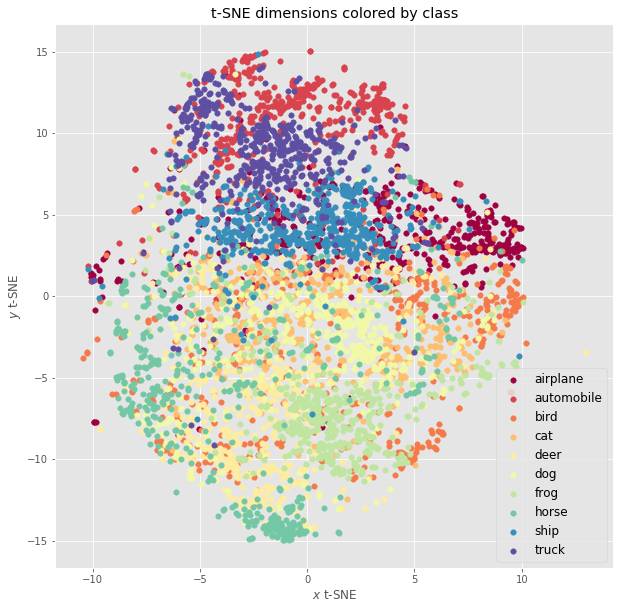

In [6]:
t_sne(extracted_train,y_train,labels,type_='training',use_PCA=False)

Using PCA

Cumulative explained variation for 50 principal components: 0.6425194573171099
[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.006s...
[t-SNE] Computed neighbors for 5000 samples in 1.794s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 10.859834
[t-SNE] Computed conditional probabilities in 0.114s
[t-SNE] Iteration 50: error = 92.7922821, gradient norm = 0.0076288 (50 iterations in 8.564s)
[t-SNE] Iteration 100: error = 89.6761246, gradient norm = 0.0082185 (50 iterations in 7.212s)
[t-SNE] Iteration 150: error = 89.5925674, gradient norm = 0.0159580 (50 iterations in 7.010s)
[t-SNE] Iteration 200: error = 89.5422287, gradient norm = 0.0071435 (50 iterations

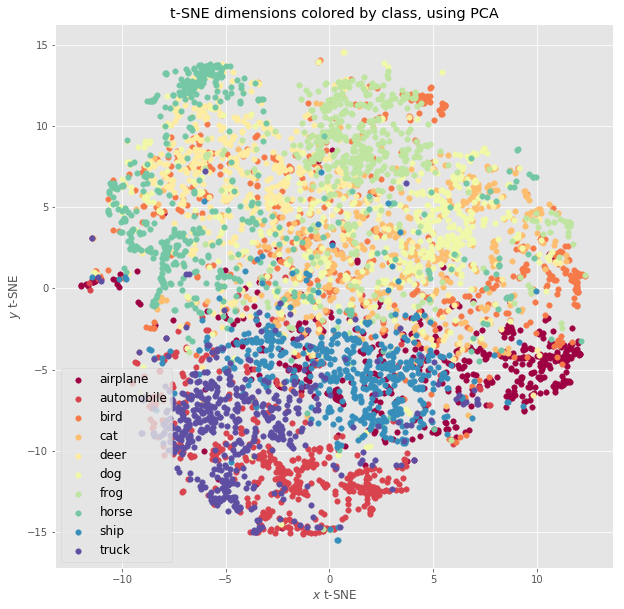

In [7]:
t_sne(extracted_train,y_train,labels,type_='training',use_PCA=True)

## Test set

Without PCA

[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.073s...
[t-SNE] Computed neighbors for 1000 samples in 6.515s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 14.930674
[t-SNE] Computed conditional probabilities in 0.025s
[t-SNE] Iteration 50: error = 86.4036026, gradient norm = 0.3703548 (50 iterations in 1.097s)
[t-SNE] Iteration 100: error = 90.2054062, gradient norm = 0.3418169 (50 iterations in 1.108s)
[t-SNE] Iteration 150: error = 90.5679855, gradient norm = 0.3149325 (50 iterations in 1.051s)
[t-SNE] Iteration 200: error = 91.2928543, gradient norm = 0.3219125 (50 iterations in 1.026s)
[t-SNE] Iteration 250: error = 91.3554230, gradient norm = 0.3229937 (50 iterations in 1.058s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 91.355423
[t-SNE] Iteration 300: error = 2.0142930, gradient norm = 0.0050399 (50 iterations in 0.926s)
[t-SNE] Error after 300 iterations: 2.014293
t-SNE done! Time el

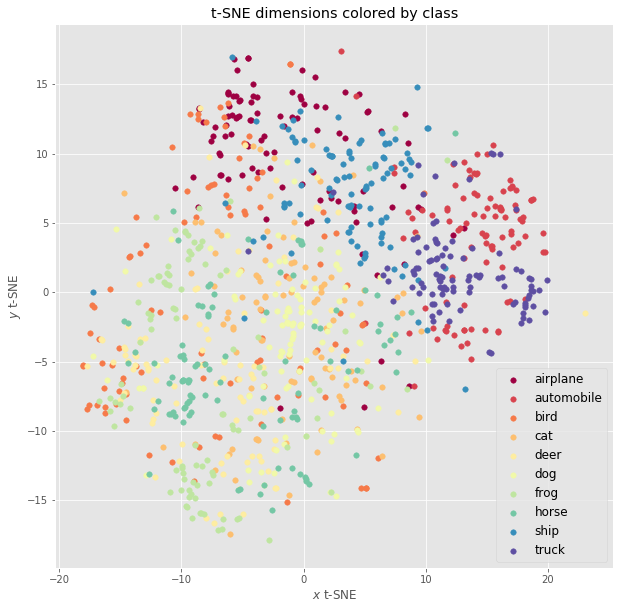

In [8]:
t_sne(extracted_test,y_test,labels,type_='test',use_PCA=False)

Using PCA

Cumulative explained variation for 50 principal components: 0.6623504501891457
[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.001s...
[t-SNE] Computed neighbors for 1000 samples in 0.087s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 13.514142
[t-SNE] Computed conditional probabilities in 0.023s
[t-SNE] Iteration 50: error = 79.4694672, gradient norm = 0.3702309 (50 iterations in 1.040s)
[t-SNE] Iteration 100: error = 80.5964508, gradient norm = 0.3618298 (50 iterations in 1.045s)
[t-SNE] Iteration 150: error = 80.7462082, gradient norm = 0.3548377 (50 iterations in 1.089s)
[t-SNE] Iteration 200: error = 82.9747009, gradient norm = 0.3424987 (50 iterations in 1.001s)
[t-SNE] Iteration 250: error = 80.9773026, gradient norm = 0.3499759 (50 iterations in 1.031s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 80.977303
[t-SNE] Iteration 300: error = 1.8572736, gradient norm = 0.0028807 (50 iterati

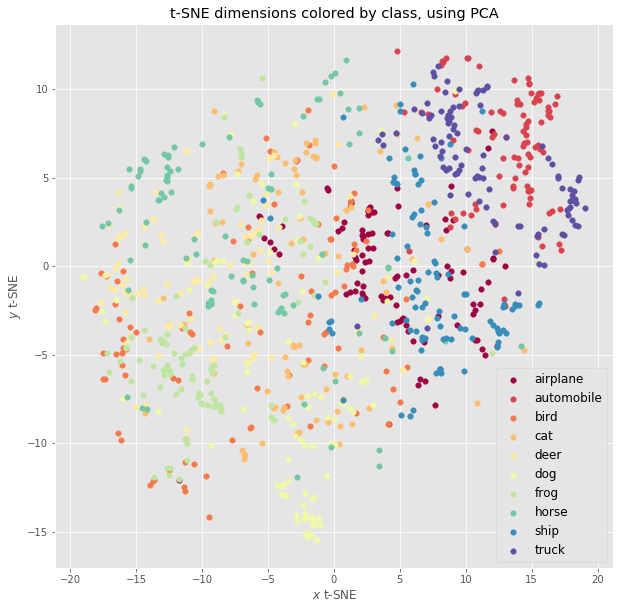

In [9]:
t_sne(extracted_test,y_test,labels,type_='test',use_PCA=True)